# Hakan Alif Pramudya
# TI-3E
# 16

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Segmentasi Gambar dengan Clustering

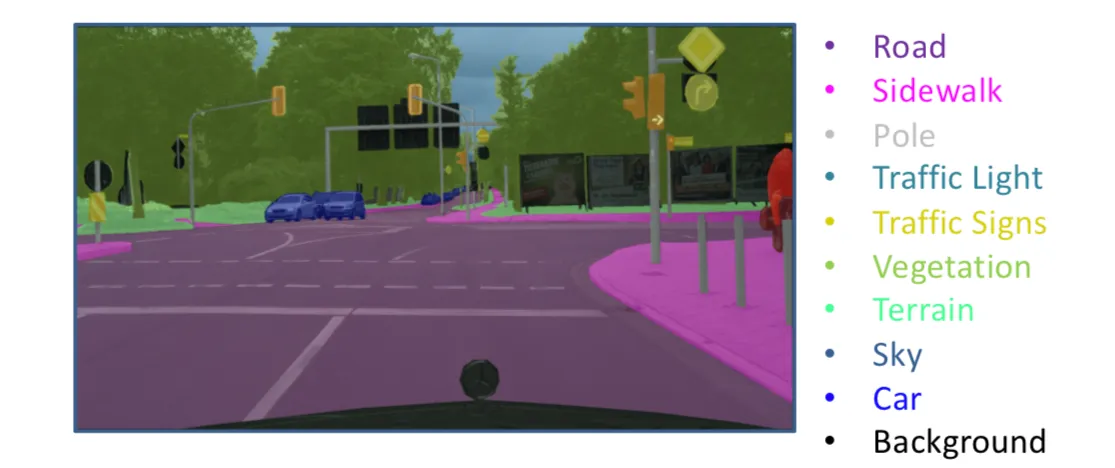

Segmentasi merupakan salah satu cara untuk membedakan antara objek satu dengan objek lainnya dalam suatu citra. Cara ini dapat dilakukan dengan mengelompokkan nilai pixel citra berdasarkan kedekatan warnanya.

Pada UTS kali ini, Anda diminta untuk melakukan segmentasi citra plat nomor kendaraan di Indonesia. Fungsi segmentasi dalam kasus ini adalah mempermudah pembacaan plat nomor kendaraan sebelum proses selanjutnya, seperti pembacaan karakter pada plat nomor.

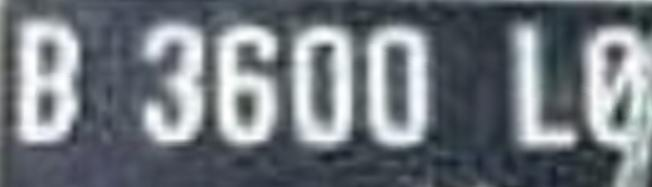

# Ketentuan UTS

Berdasarkan pemaparan kasus, Anda diminta untuk,

1. Pilih 5 citra plat nomor untuk setiap anggota kelompok dari dataset yang telah disediakan. [DOWNLOAD](https://storage.googleapis.com/kuliah_mah/dummy.zip)
2. Lakukan segmentasi pada citra plat nomor untuk memperjelas karakter pada plat nomor.
3. Anda dapat menggunakan algortima K-Means seperti yang telah dijelaskan pada praktikum sebelumnya atau menggunakan algoritma klasterisasi yang lain.
4. Anda diperkenankan untuk melakukan pra pengolahan data (preprocessing) pada citra seperti,
    - Merubah color space
    - Reduksi dimensi
    - dsb
5. Tampilkan perbandingan citra antara sebelum dan sesudah di segmentasi

**Open Challange** (Opsional)
 - Bagaimana cara melakukan evaluasi pada hasil segementasi?
 - Terapkan pada kasus ini!


**Catatan:**
1. Proses loading citra dicontohkan dengan menggunakan library openCV
2. Secara default, openCV akan memuat citra dalam format BGR

# Kode Bantuan

In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

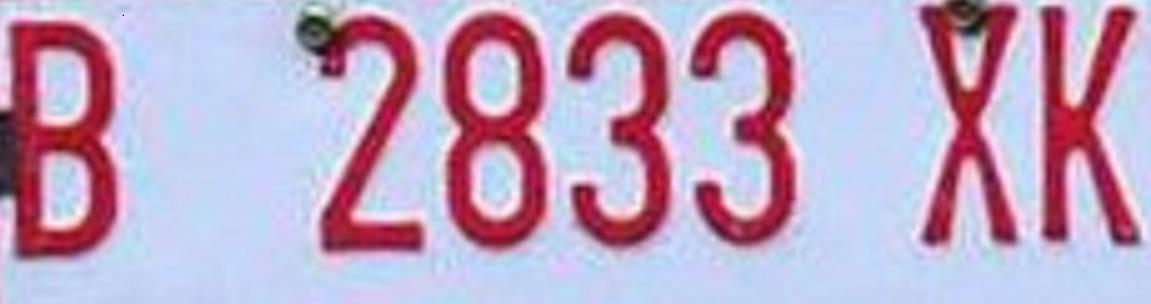

In [ ]:
# Load Gambar
img = cv2.imread('2.jpeg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img) # khusus google colab karena ada issue

In [ ]:
h, w, ch= img.shape
print(h)
print(w)
print(ch)

304
1151
3


In [ ]:
data = img / 255.0
data = data.reshape(h * w, ch)
data.shape

(349904, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=14)

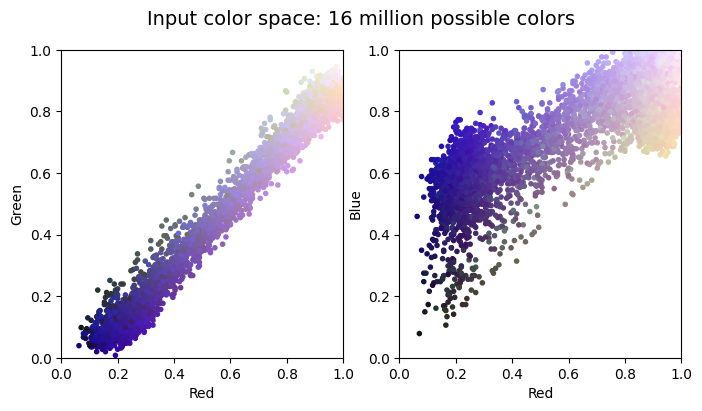

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')

# Contoh Hasil Yang Diharapkan

Text(0.5, 1.0, '2-color Image')

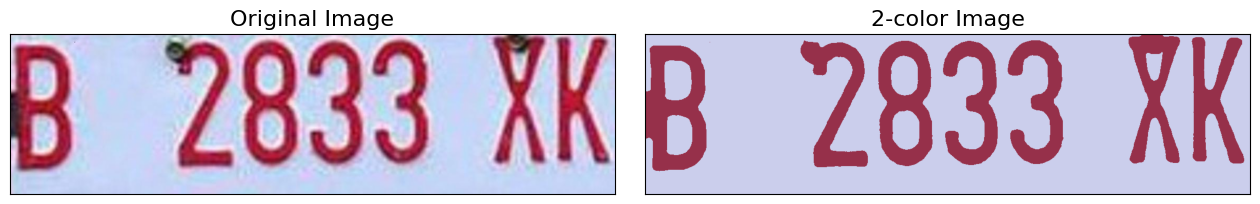

In [ ]:
img_recolored = new_colors.reshape(img.shape)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(img_recolored)
ax[1].set_title('2-color Image', size=16)

# Jawab

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow # path cv2.imshow di google colab

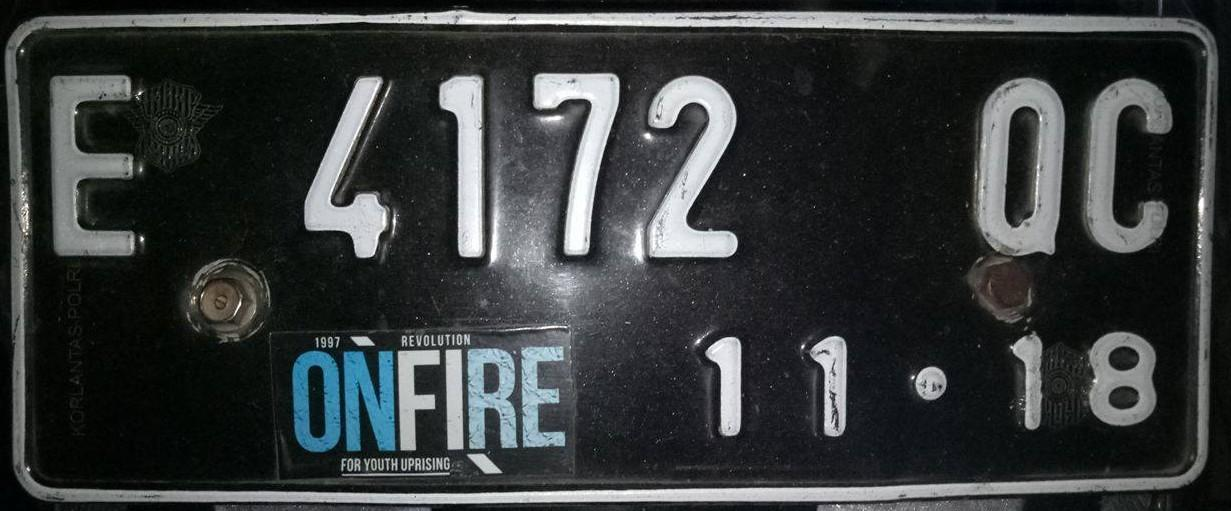

In [5]:
# Load Gambar
img2 = cv2.imread('/content/drive/MyDrive/ML/dummy/17-E-4172-QC-11-18_jpg.rf.242a2fe2326bfdc57b7473d7a998c351.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img2) # khusus google colab karena ada issue

511
1231
3


Text(0.5, 1.0, '2-color Image')

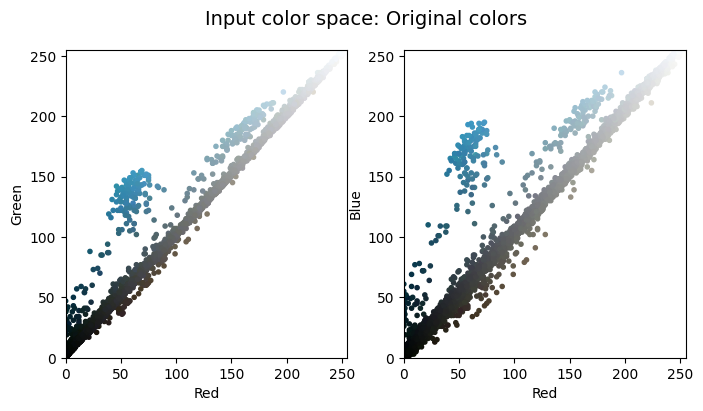

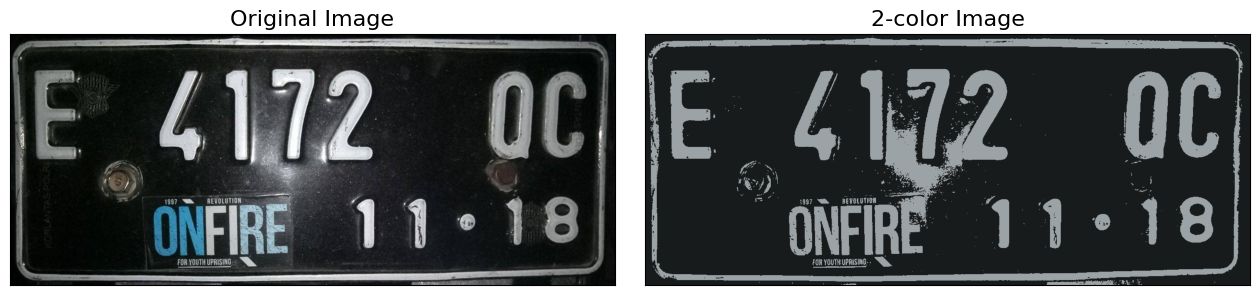

In [7]:
from sklearn.cluster import KMeans

h, w, ch= img2.shape
print(h)
print(w)
print(ch)

data = img2 / 255.0
data = data.reshape(h * w, ch)
data.shape

# Konversi gambar ke ruang warna RGB (jika belum dalam ruang warna tersebut)
img_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

h, w, ch = img_rgb.shape

data = img_rgb.reshape(h * w, ch)

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset data acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, c=colors/255.0, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 255), ylim=(0, 255))

    ax[1].scatter(R, B, c=colors/255.0, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 255), ylim=(0, 255))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: Original colors')

# Definisikan model k-means
kmeans = KMeans(n_clusters=2, random_state=0, n_init=1)  # Jumlah cluster diinginkan

# Fit data ke model k-means
kmeans.fit(data)

# Mendapatkan nilai titik tengah tiap cluster
cluster_centers = kmeans.cluster_centers_

# Tambahkan inisialisasi new_colors
new_colors = cluster_centers[kmeans.labels_].reshape(h, w, ch)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

# Pastikan Anda menggunakan img_rgb dan new_colors yang benar
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(new_colors.astype(np.uint8))
ax[1].set_title('2-color Image', size=16)

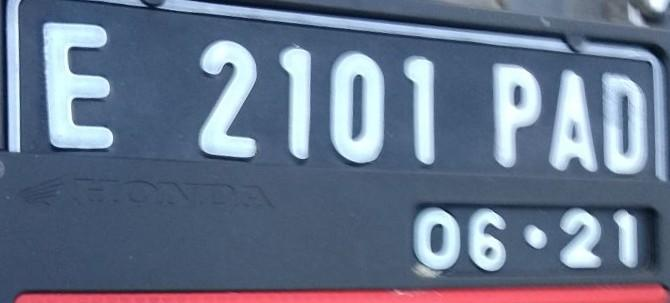

In [8]:
# Load Gambar
img3 = cv2.imread('/content/drive/MyDrive/ML/dummy/25-E-2101-PAD-06-21_jpeg.rf.fb688472f5ba9c0c445f9d9330f39508.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img3) # khusus google colab karena ada issue

303
670
3


Text(0.5, 1.0, '2-color Image')

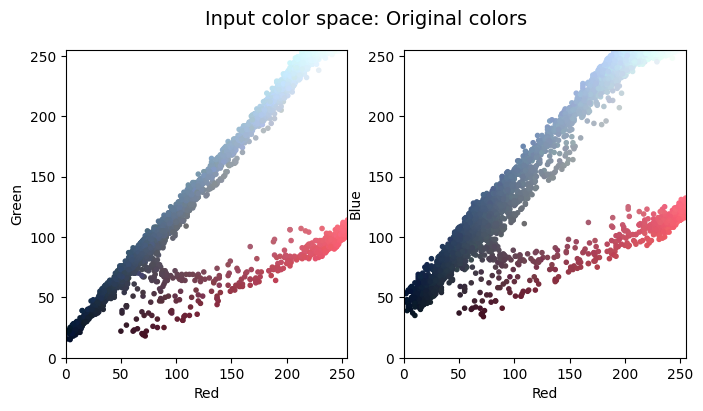

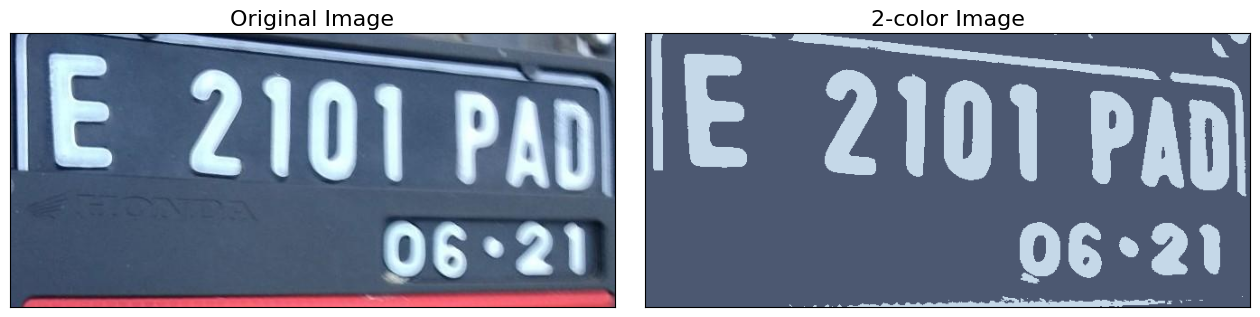

In [9]:
from sklearn.cluster import KMeans

h, w, ch= img3.shape
print(h)
print(w)
print(ch)

data = img3 / 255.0
data = data.reshape(h * w, ch)
data.shape

# Konversi gambar ke ruang warna RGB (jika belum dalam ruang warna tersebut)
img_rgb = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

h, w, ch = img_rgb.shape

data = img_rgb.reshape(h * w, ch)

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset data acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, c=colors/255.0, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 255), ylim=(0, 255))

    ax[1].scatter(R, B, c=colors/255.0, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 255), ylim=(0, 255))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: Original colors')

# Definisikan model k-means
kmeans = KMeans(n_clusters=2, random_state=0, n_init=1)  # Jumlah cluster diinginkan

# Fit data ke model k-means
kmeans.fit(data)

# Mendapatkan nilai titik tengah tiap cluster
cluster_centers = kmeans.cluster_centers_

# Tambahkan inisialisasi new_colors
new_colors = cluster_centers[kmeans.labels_].reshape(h, w, ch)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

# Pastikan Anda menggunakan img_rgb dan new_colors yang benar
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(new_colors.astype(np.uint8))
ax[1].set_title('2-color Image', size=16)

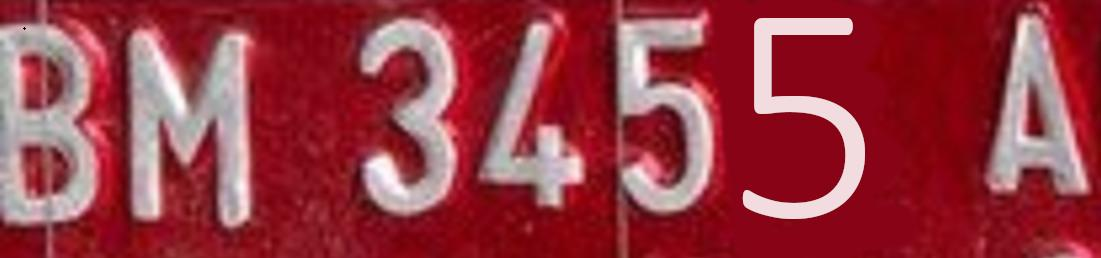

In [10]:
# Load Gambar
img4 = cv2.imread('/content/drive/MyDrive/ML/dummy/BM3455A_PNG.rf.f1771f32a53d195647546d4adde981aa.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img4) # khusus google colab karena ada issue

258
1101
3


Text(0.5, 1.0, '2-color Image')

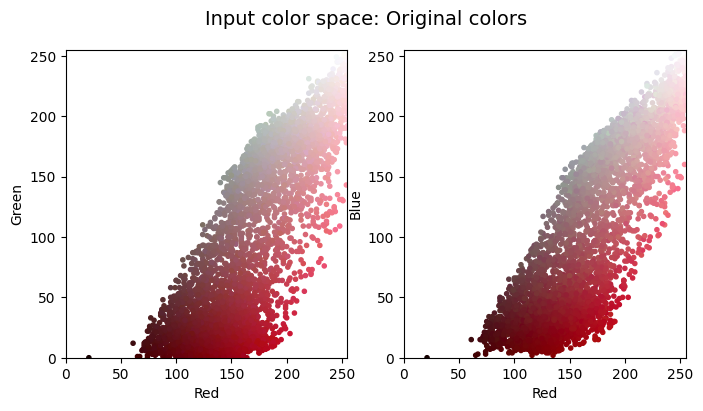

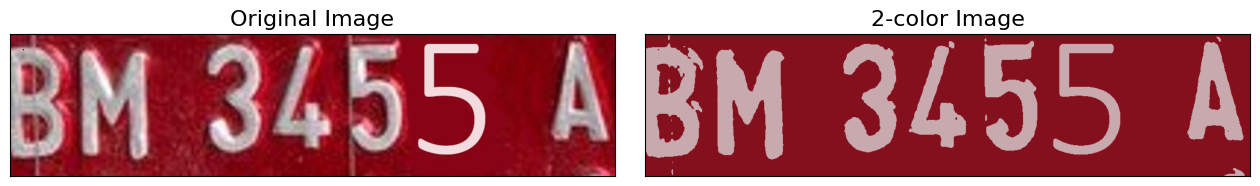

In [11]:
from sklearn.cluster import KMeans

h, w, ch= img4.shape
print(h)
print(w)
print(ch)

data = img4 / 255.0
data = data.reshape(h * w, ch)
data.shape

# Konversi gambar ke ruang warna RGB (jika belum dalam ruang warna tersebut)
img_rgb = cv2.cvtColor(img4, cv2.COLOR_BGR2RGB)

h, w, ch = img_rgb.shape

data = img_rgb.reshape(h * w, ch)

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset data acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, c=colors/255.0, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 255), ylim=(0, 255))

    ax[1].scatter(R, B, c=colors/255.0, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 255), ylim=(0, 255))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: Original colors')

# Definisikan model k-means
kmeans = KMeans(n_clusters=2, random_state=0, n_init=1)  # Jumlah cluster diinginkan

# Fit data ke model k-means
kmeans.fit(data)

# Mendapatkan nilai titik tengah tiap cluster
cluster_centers = kmeans.cluster_centers_

# Tambahkan inisialisasi new_colors
new_colors = cluster_centers[kmeans.labels_].reshape(h, w, ch)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

# Pastikan Anda menggunakan img_rgb dan new_colors yang benar
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(new_colors.astype(np.uint8))
ax[1].set_title('2-color Image', size=16)

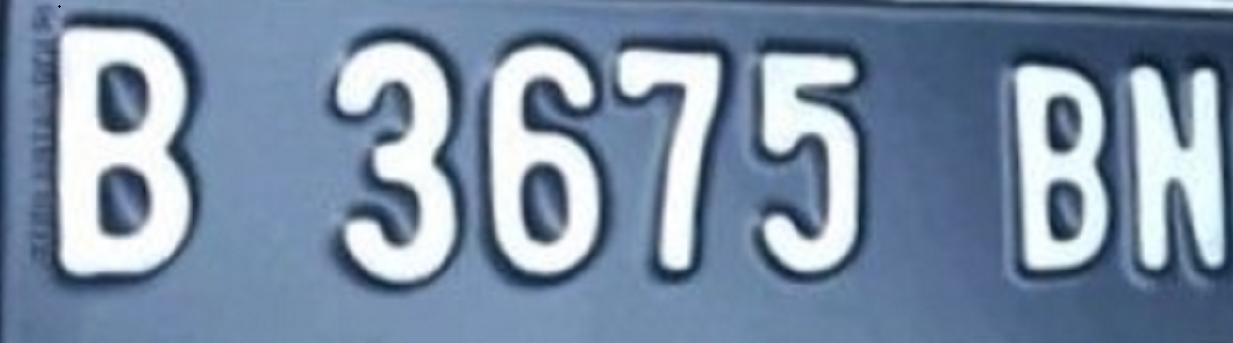

In [12]:
# Load Gambar
img5 = cv2.imread('/content/drive/MyDrive/ML/dummy/B3675BN_png.rf.9600a7928b9a7189a89e2cd84ce0e43c.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img5) # khusus google colab karena ada issue

343
1233
3


Text(0.5, 1.0, '2-color Image')

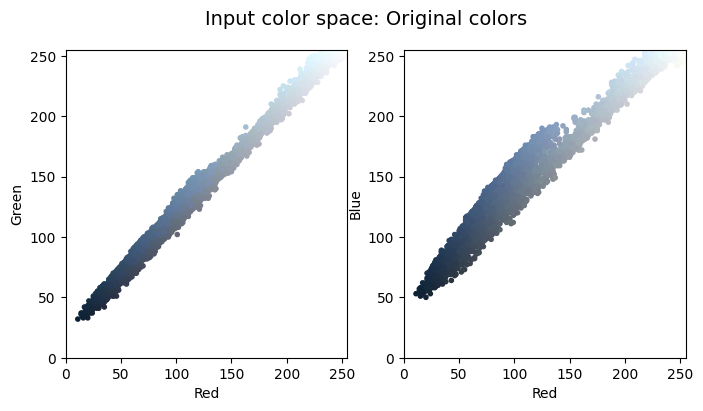

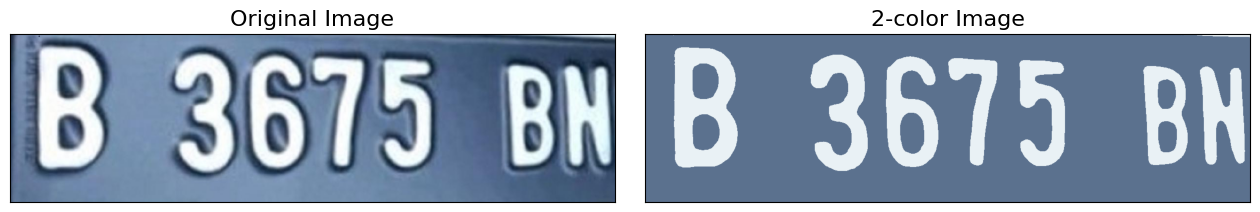

In [13]:
from sklearn.cluster import KMeans

h, w, ch= img5.shape
print(h)
print(w)
print(ch)

data = img5 / 255.0
data = data.reshape(h * w, ch)
data.shape

# Konversi gambar ke ruang warna RGB (jika belum dalam ruang warna tersebut)
img_rgb = cv2.cvtColor(img5, cv2.COLOR_BGR2RGB)

h, w, ch = img_rgb.shape

data = img_rgb.reshape(h * w, ch)

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset data acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, c=colors/255.0, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 255), ylim=(0, 255))

    ax[1].scatter(R, B, c=colors/255.0, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 255), ylim=(0, 255))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: Original colors')

# Definisikan model k-means
kmeans = KMeans(n_clusters=2, random_state=0, n_init=1)  # Jumlah cluster diinginkan

# Fit data ke model k-means
kmeans.fit(data)

# Mendapatkan nilai titik tengah tiap cluster
cluster_centers = kmeans.cluster_centers_

# Tambahkan inisialisasi new_colors
new_colors = cluster_centers[kmeans.labels_].reshape(h, w, ch)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

# Pastikan Anda menggunakan img_rgb dan new_colors yang benar
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(new_colors.astype(np.uint8))
ax[1].set_title('2-color Image', size=16)

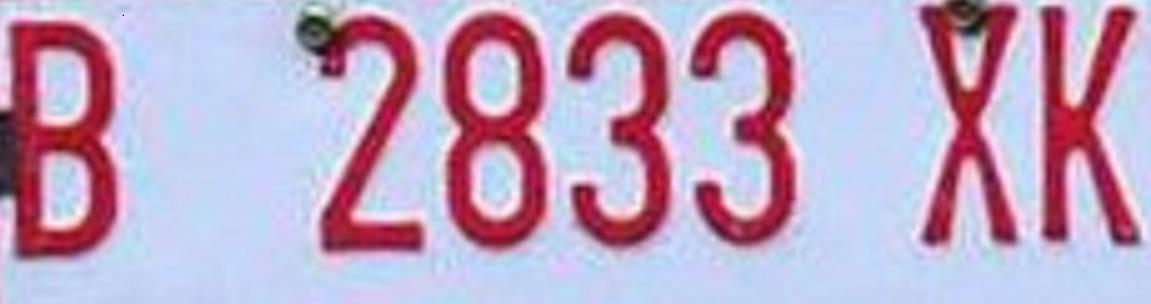

In [14]:
# Load Gambar
img6 = cv2.imread('/content/drive/MyDrive/ML/dummy/B2833XK_png.rf.31ea229a61bc8ed55b3115a82ae912e7.jpg')

# Tampilkan gambar
# cv2.imshow(img)
cv2_imshow(img6) # khusus google colab karena ada issue

304
1151
3


Text(0.5, 1.0, '2-color Image')

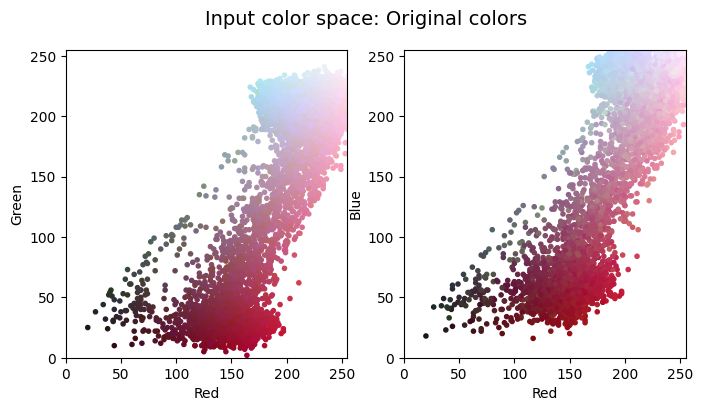

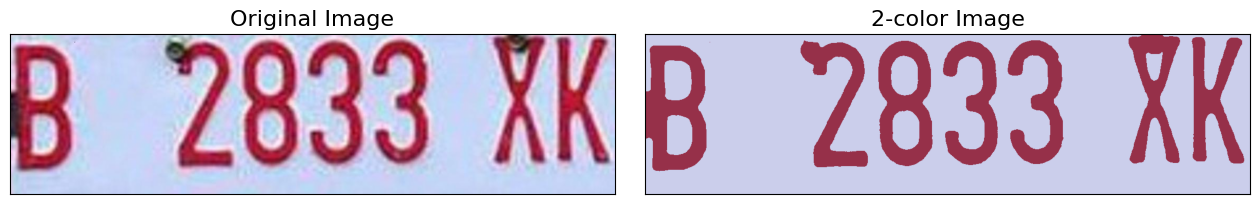

In [15]:
from sklearn.cluster import KMeans

h, w, ch= img6.shape
print(h)
print(w)
print(ch)

data = img6 / 255.0
data = data.reshape(h * w, ch)
data.shape

# Konversi gambar ke ruang warna RGB (jika belum dalam ruang warna tersebut)
img_rgb = cv2.cvtColor(img6, cv2.COLOR_BGR2RGB)

h, w, ch = img_rgb.shape

data = img_rgb.reshape(h * w, ch)

def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # Pilih subset data acak
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(8, 4))
    ax[0].scatter(R, G, c=colors/255.0, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 255), ylim=(0, 255))

    ax[1].scatter(R, B, c=colors/255.0, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 255), ylim=(0, 255))

    fig.suptitle(title, size=14)

plot_pixels(data, title='Input color space: Original colors')

# Definisikan model k-means
kmeans = KMeans(n_clusters=2, random_state=0, n_init=1)  # Jumlah cluster diinginkan

# Fit data ke model k-means
kmeans.fit(data)

# Mendapatkan nilai titik tengah tiap cluster
cluster_centers = kmeans.cluster_centers_

# Tambahkan inisialisasi new_colors
new_colors = cluster_centers[kmeans.labels_].reshape(h, w, ch)

fig, ax = plt.subplots(1, 2, figsize=(16, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)

# Pastikan Anda menggunakan img_rgb dan new_colors yang benar
ax[0].imshow(img_rgb)
ax[0].set_title('Original Image', size=16)
ax[1].imshow(new_colors.astype(np.uint8))
ax[1].set_title('2-color Image', size=16)